# 분류의 개요

- 지도학습 > 분류
- 분류: 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것

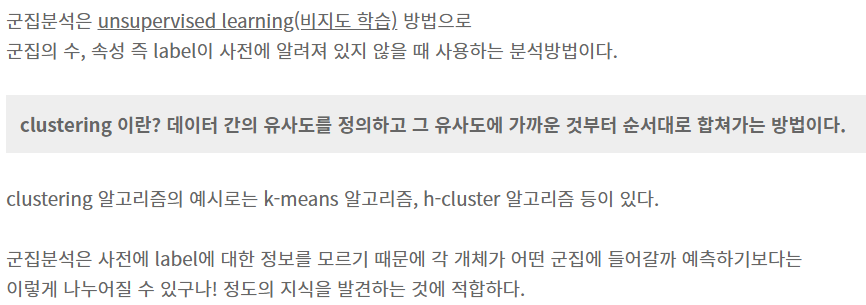

- 종류: 배깅, 부스팅, 스태깅
- 대부분 동일한 알고리즘을 결합함.
- 기본 알고리즘으로은 일반적으로 결정 트리를 사용함


# 결정 트리

## 용어
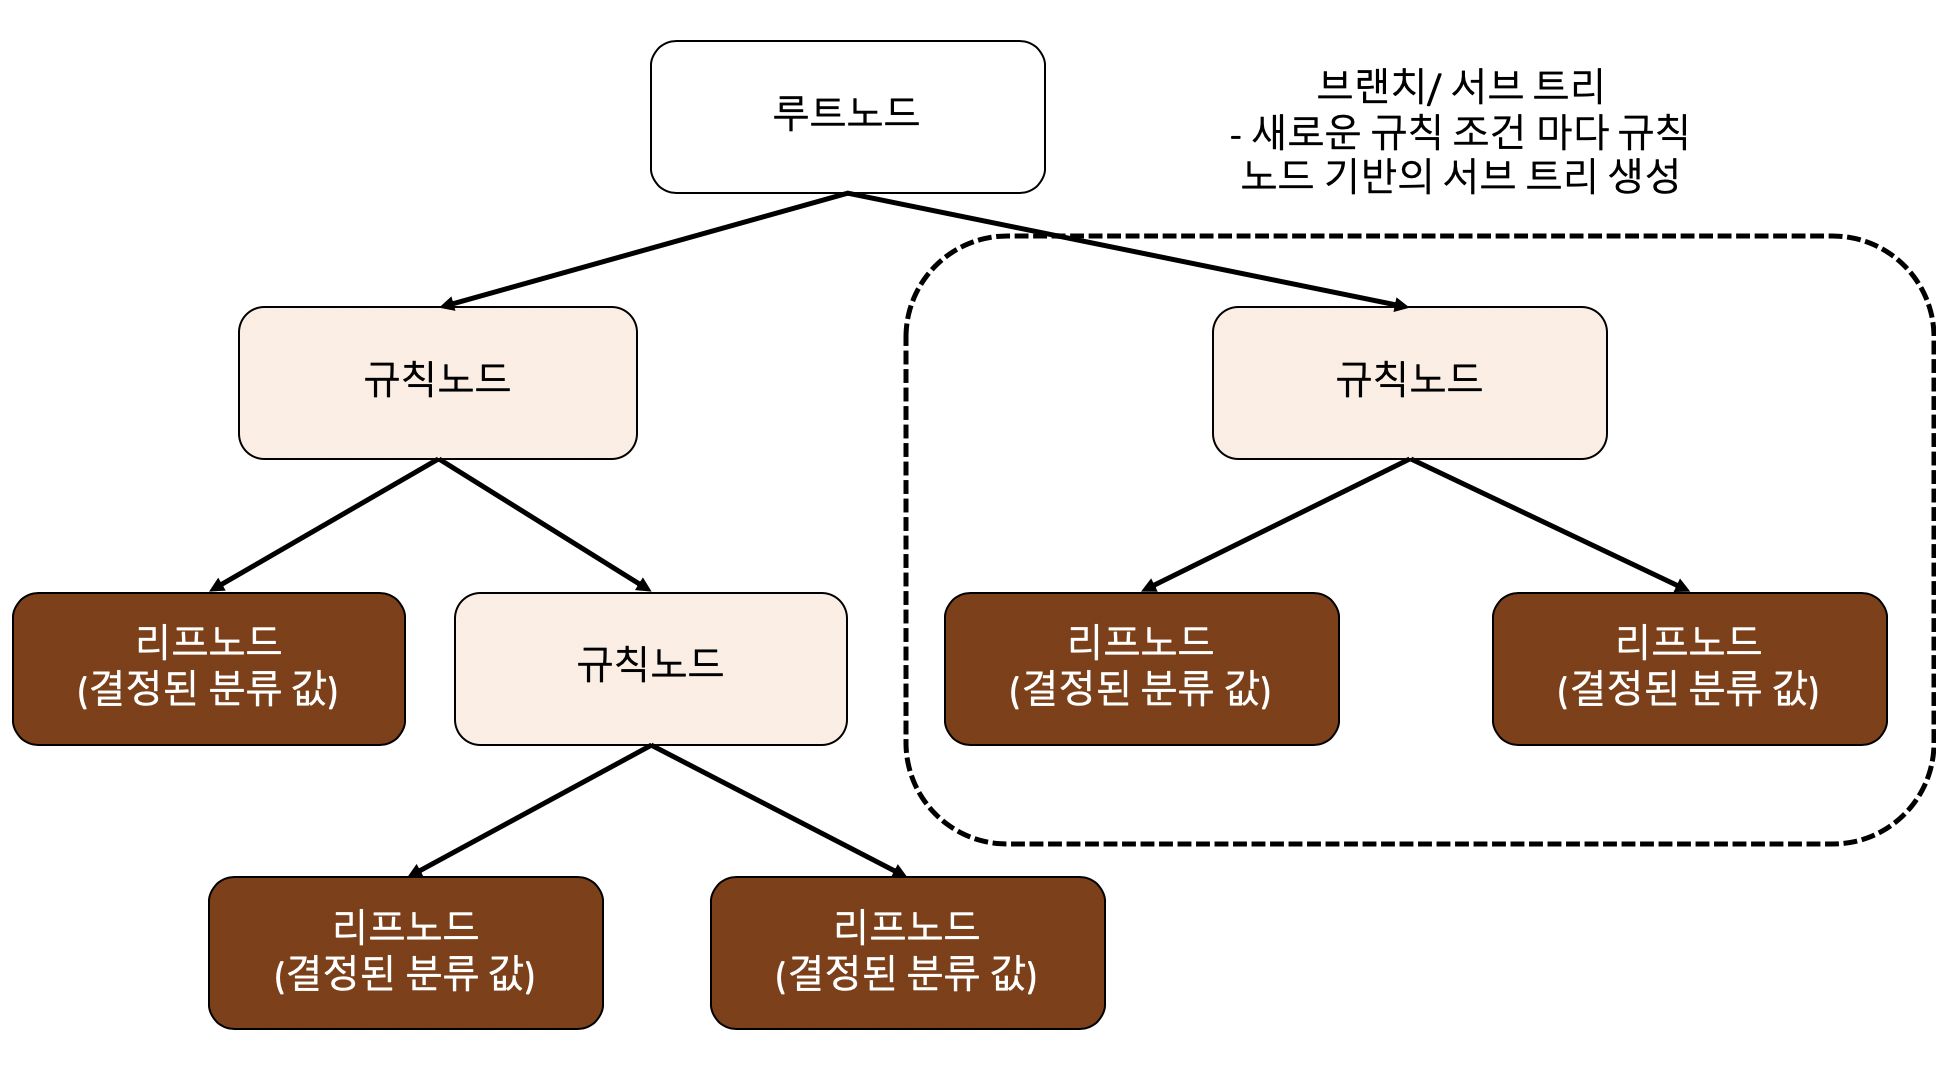

- 리프노드: 더 이상 자식 노트가 없는 노드
- 브랜치 노드: 자식 노드가 있는 노드 (분할 규칙 조건 가짐)


- 데이터 세트의 피처가 결합하여 규칙 조건을 만들 때마다 규칙 노드가 만들어짐
- 트리의 깊이가 깊어질수록 과적합에 의해 예측 성능이 저하될 가능성이 높음.
    - => 가능한 적은 결정 노드를 가질 수 있도록
    - => 나눈 데이터가 최대한 균일한 데이터일 수 있도록 노드 규칙이 정해져야함.

__<정보의 균일도를 측정하는 지표>__
1. 정보 이득
    - $= (1 - 엔트로피)$
    - 엔트로피: 주어진 데이터 집합의 혼잡도. 낮을수록 균일함.
    - 높을수록(1) 균일함
2. 지니 계수
    - 낮을수록(0) 균일함
    - sklearn의 DecisionTreeClassifier에서 데이터를 분할하는 기준으로 사용함

## 결정 트리 모델의 특징

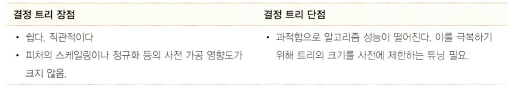

## 결정 트리 하이퍼 파라미터

- 분류를 위한 DecisionTreeClassifier와 회귀를 위한 DecisionTreeRegressor 클래스 모두 동일한 파라미터 사용함

- min_samples_split
    - 노드를 분할하기 위한 최소한의 샘플 데이터 수
    - 과적합을 막기 위해 사용
    - default = 2
    - 작게(1로) 설정할수록 분할되는 노드 수가 많아짐 => 과적합 가능성 증가
   
- min_samples_leaf
    - 리프노드가 되기위한 최소한의 샘플 데이터 수
    - 과적합을 막기 위해 사용
    - imbalanced 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 너무 크게 설정하면 안됨
    
- max_features
    - 최적의 분할을 위해 고려한 치대 피처 개수
    - 종류
        1. int형으로 지정: 대상 피처의 개수
        2. float형으로 지정: 전체 피처 중 대상 피처의 퍼센트
        3. 'sqrt' or 'auto'으로 지정: $sqrt(전체 피처 개수)$
        4. 'log'로 지정: 전체 피처 중 $log2(전체 피처 개수)$
        5. 'None'으로 지정: 데이터셋의 모든 피처를 사용 (default)
        
- max_depth
    - 트리의 최대 깊이 규정
    - default = None. (완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할 or 노드가 가지는 데이터 수가 min_samples_split보다 작아질 때까지 깊이를 계속 키움)
    - 깊이가 깊어지면 과적합할 수 있으므로 적절한 값으로 제어 필요

- max_leaf_nodes
    - 밑단 노드의 최대 개수
    
<https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html>

## 결정 트리 모델의 시각화

### 시각화 및 기본 설명

Graphviz 패키지를 사용하여 시각화

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')

In [9]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

# Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

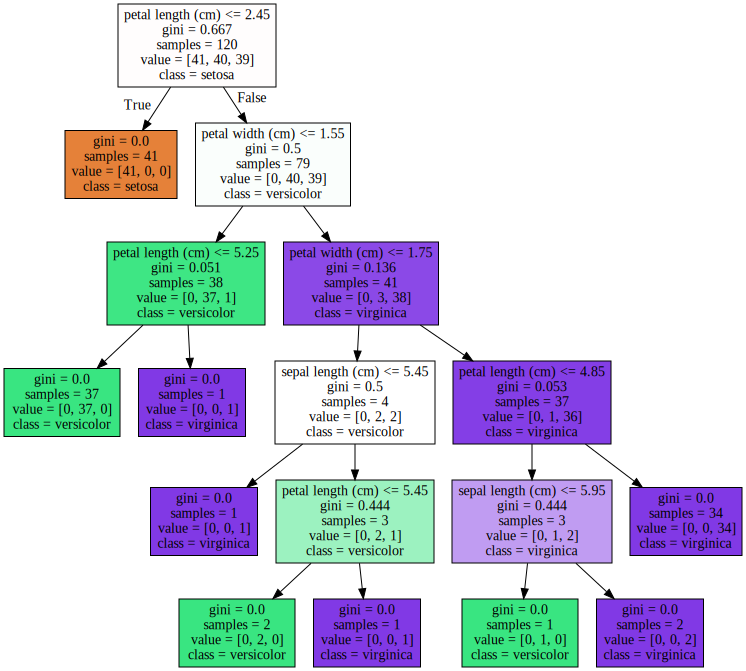

In [12]:
import graphviz

# 출력된 파일을 시각적으로 표현표현
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45 : 해당 규칙으로 자식 노드 생성.
- gini = 0.667 : 아래 value=[ ]로 주어진 데이터 분포에서의 지니 계수 (균일한 정도. 0에 가까울수록 균일함) $=(120-40)/120 = 0.667$
- samples: 현 규칙에 해당하는 데이터 수
- value: 각 클래스인 데이터 수
- class: 가장 많은 클래스

- 각 노드의 색깔: 레이블값. 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 데이터가 많음
    - 주황색: 0 (Setosa)
    - 초록색: 1 (Vrsicolor)
    - 보락색: 2 (Virginica)



규칙 생성 로직(하이퍼 파라미터)을 미리 제어하지 않으면 완벽하게 클래스 값을 구분할 때까지 계속해서 트리 노드를 만듦 => __과적합__


### 하이퍼 파라미터 변경

0.9333


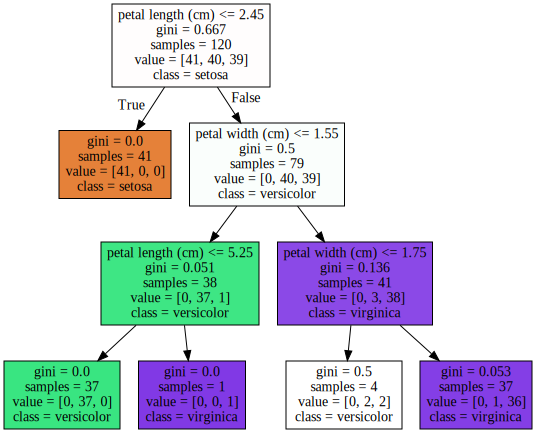

In [35]:
from sklearn import metrics

dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)

iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

model = dt_clf.fit(X_train , y_train)

prediction1 = model.predict(X_test)
print(round(metrics.accuracy_score(prediction1, y_test),4))

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

0.9333


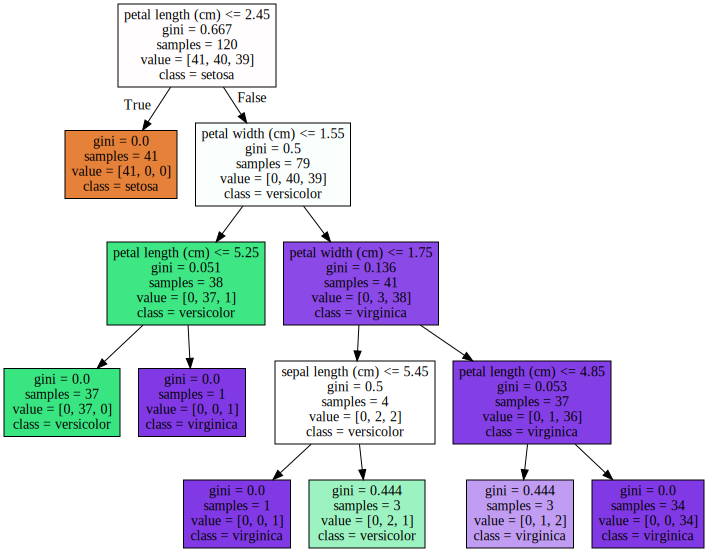

In [28]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=4)

iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

model = dt_clf.fit(X_train , y_train)

prediction1 = model.predict(X_test)
print(round(metrics.accuracy_score(prediction1, y_test),4))

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

0.9333


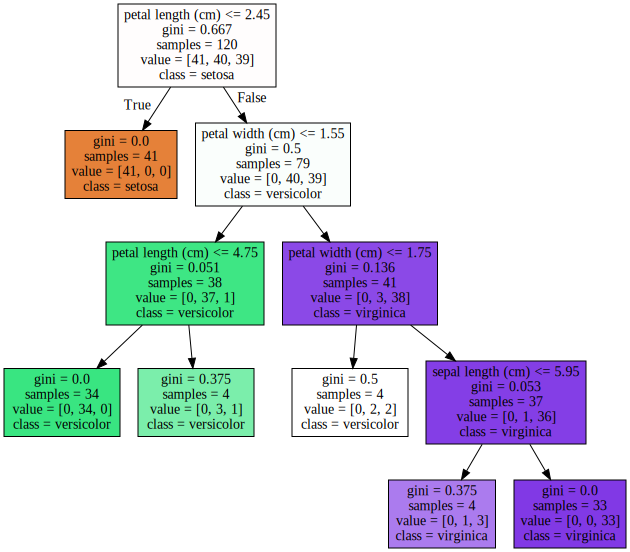

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=4)

iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

model = dt_clf.fit(X_train , y_train)

prediction1 = model.predict(X_test)
print(round(metrics.accuracy_score(prediction1, y_test),4))

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance

어떤 속성을 규칙 조건으로 선택하느냐 중요함.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


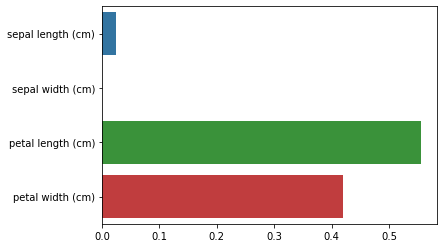

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

결정트리는 다른 알고리즘에 비해 직관적이기 때문에 시각적으로 표현하기 쉬움

##  결정 트리 과적합

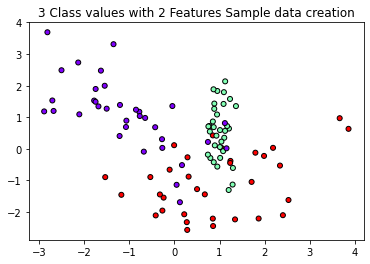

In [36]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                           n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [37]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

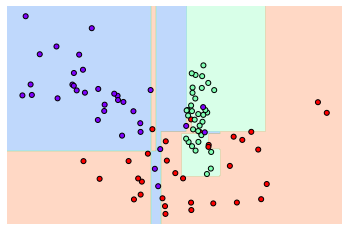

In [38]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

 => 과적합

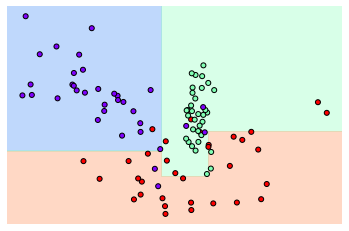

In [39]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 앙상블 학습

__<앙상블 학습의 유형>__
1. Voting
    - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
    - 서로 다른 알고리즘을 가진 분류기를 결합
2. Bagging
    - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
    - 각각의 분류기가 모두 같은 유형의 알고리즘 기반
    - 데이터 샘플링을 분류기별로 다르게 하여 학습하여 보팅 수행
    - 부트스트래핑 분할: 개별 분류가에게 데이터를 샘플링하여 추출하는 방식
    - 하나의 분류기 내의 데이터에 중복된 데이터 있을 수 있음 (중복 허용)
    - 대부분 결정 트리 알고리즘을 기반으로 함 (여러개 사용하여 과적합 방지)
3. Boositng
    - 여러 개의 분류기가 순차적으로 학습하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
    - 대부분 결정 트리 알고리즘을 기반으로 함 (여러개 사용하여 과적합 방지)
4. Stagging
    - 여러 개의 모델 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과 예측

## 보팅 유형 - 하드보팅 & 소프트 보팅

- 하드 보팅
    - 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
- 소프트 보팅
    - 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균하여 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정
    - (일반적인 보팅 방법)

## Voting Classifier

In [40]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [41]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# Random Forest

- Bagging의 대표적인 알고리즘
- 비교적 빠른 수행 속도
- 결정 트리를 기반으로 앙상블
- 결정 트리의 쉽고 직관적인 장점 닮음

# GBM(Gradient Boosting Machine)

## GBM의 개요 및 실습

- Boosting
    - 여러 개의 약합 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터게 가중치 부여를 통해 오류를 개선해 나가면서 학습
    1. AdaBoost
    2. Gradient Boost
        - 가중치 업데이트에 경사하강법을 이용
        - 일반적으로 RF보다 성능이 뛰어나지만, 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요함
        - 병렬 처리 지원X
    
      

## GBM 하이퍼 파라미터 튜닝

- loss: 경사 하강법에 사용할 비용 함수. {‘deviance’, ‘exponential’}. default = 'deviance'
- learning_rate
    - default = 0.1
    - 너무 작은 값 적용 => 업데이트 되는 값 작아짐 => 최소 오류 값을 찾음 => 성능 높아질 수 있음 (but 오래걸림)
    - 너무 큰 값 적용 => 최소 오류 값 찾기 못하고 지나침 => 성능 낮아질 수 있음 (but 빠름)
    - n_estimators와의 상호 보완적 사용 필요
- n_estimators: 사용할 week learner의 개수. default = 100
- subsample
    - week learner가 학습에 사용하는 데이터의 샘플링 비율
    - default = 1
    - 과적합이 염려되는 경우 subsample < 1 로 설정
    

# XGBoost (eXtra Gradient Boost)

- GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결

**<특징>**
   1. 뛰어난 예측 성능
   2. GBM 대비 빠른 수행 시간 (but RF 등에 비해서는 느림)
   3. 과적합 규제
   4. Tree Pruning: GBM은 부정 손실이 발생하기 전까지 분할 수행. XGBoost에서는 하이퍼파라미터 설정 없이도 더 이상 긍정 이득이 없는 분할을 가지치기하여 분할 수를 더 줄임
   5. 자체 내장된 교차 검증: 교차 검증을 통해 평가 데이터 셋의 평가값이 최적화되면 반복을 중간에 멈출 수 있는 조기 중단 기능도 있음
   6. 결손값 자체 처리

# LightGBM

- XGBoost에서 GridSearchCV로 하이퍼파라미터 튜닝을 수행하다 보면 수행 시간이 너무 오래 걸림.
- 장점
    - XGBoost보다 학습 시간, 메모리 사용량 적음. 
    - XGBoost와 예측 성능 비슷. 
    - 카테고리형 피처의 자동 변환과 최적 분할
- 단점: 적은 데이터 세트에 적용할 경우, 과적합이 발생하기 슁무
- 일반 GBM 계열의 트리 분할 방법 (균형 트리 분할과 다르게 리프 중심 트리 분할 방식 사용
    - 균형 트리 분할: 모든 자식노드에서 분할 시행. 오버피팅에 강함. 오래 걸림
    - 리프 중심 트리 분할: 최대 손실값을 가지는 리프 노드를 지속적으로 분할. (트리 깊어지고, 비대칭) 예측 오류 손실 최소화
